## Problem Statement
**Cardiovascular diseases are one of the leading causes of death worldwide. Early detection of heart disease can help prevent serious complications and save lives.**

**This project aims to analyze patient health data and build a machine learning model to predict whether a person is at risk of heart disease. The goal is to support hospitals in identifying high-risk patients and enabling early medical intervention.**

## Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib
import warnings
warnings.filterwarnings('ignore')

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
data=pd.read_csv('values.csv')
target=pd.read_csv('labels.csv')

## Understand The Data(basic Checks)

In [3]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
data.shape

(180, 14)

In [5]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [8]:
# Insights
# There are totaly 180 entries
# there is no missing values
# there is no duplicated values are present
# This data contains diffrent data types such as int64,float64,object

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


In [10]:
# Insights
# Form the diffrence between the 75% and max column it clearly shows some outliers present are present
# Some of the columns are right skewed and same of the column are left skewed

## Explorative Data Analysis

In [11]:
from ydata_profiling import ProfileReport
profile=ProfileReport(data,title='EDA',explorative=False)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 433.14it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [13]:
continuous=['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','max_heart_rate_achieved','age',]
discreate=['slope_of_peak_exercise_st_segment','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl',
          'resting_ekg_results','sex','exercise_induced_angina']

## Univarient Analysis

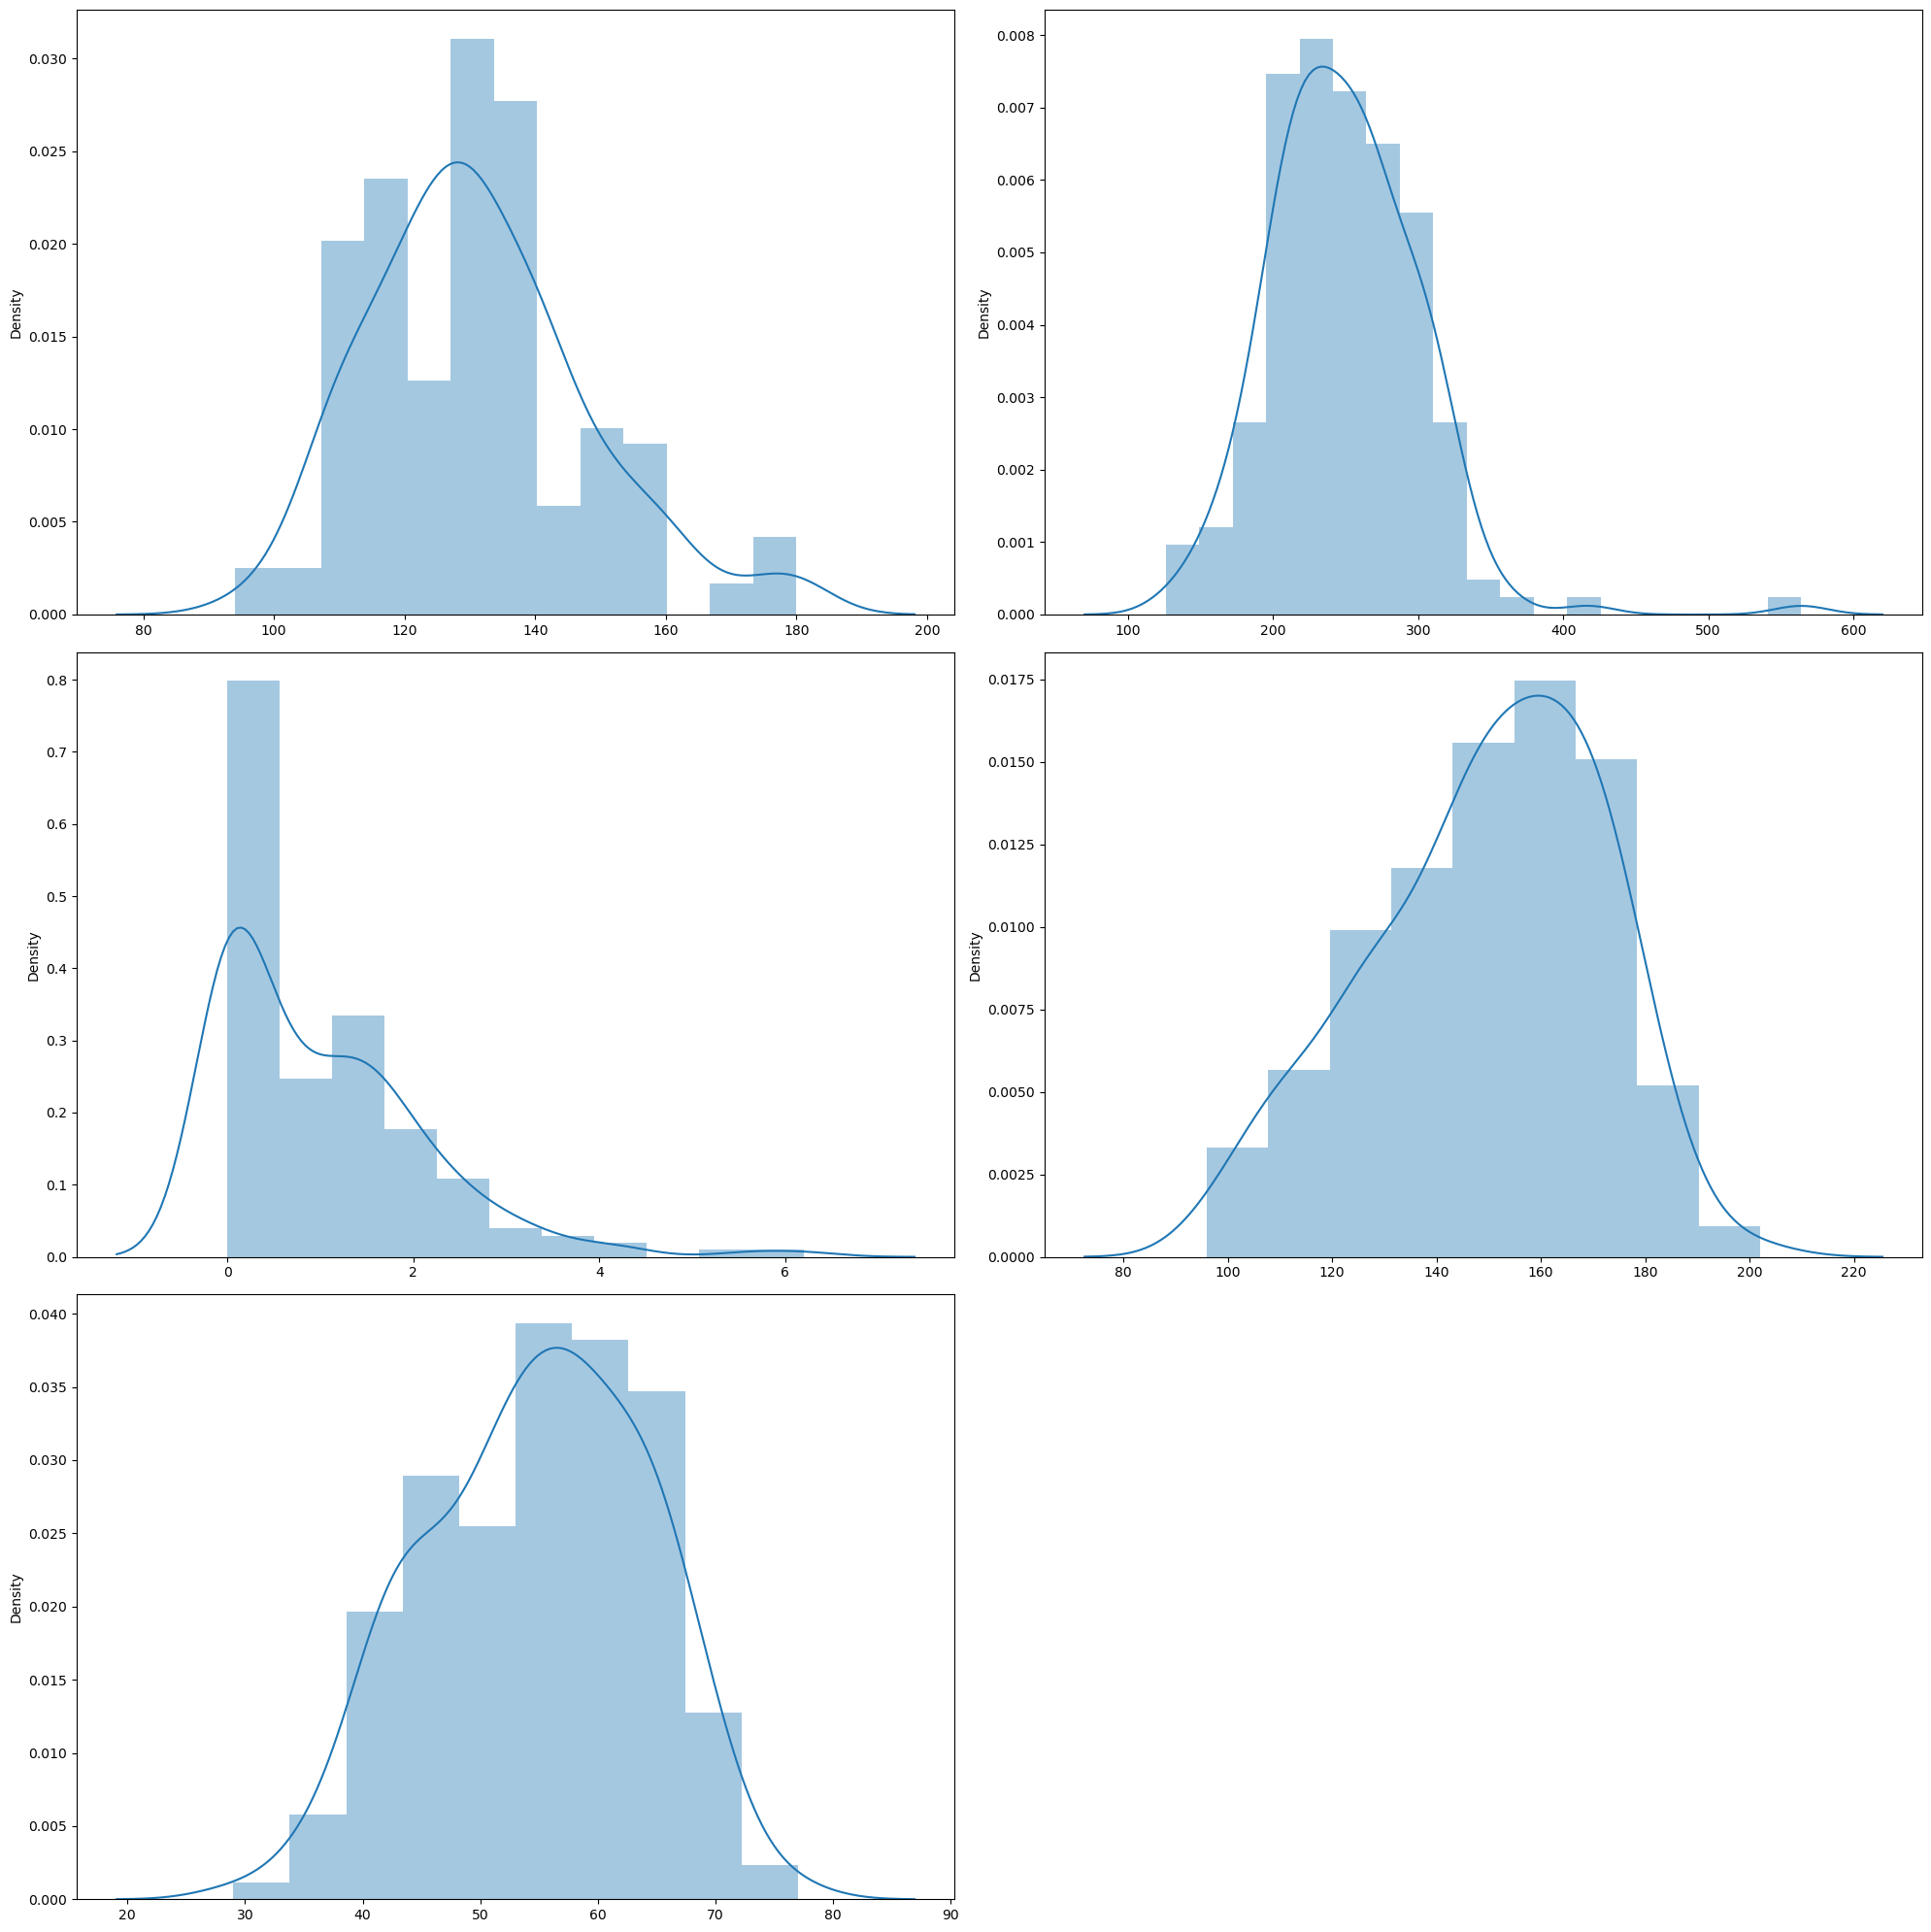

In [14]:
# Continuous
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for col in continuous:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(x=data[col])
    plotnumber+=1
plt.tight_layout()
plt.show()

In [15]:
# Insights
# Resting Blood Pressure: Slightly right-skewed distribution with a few high-value outliers.
# Serum Cholesterol: Highly positively skewed with extreme outliers at the upper range.
# Oldpeak (ST Depression): Strong right skew indicating most patients have low values with few extreme cases.
# Max Heart Rate Achieved: Approximately normally distributed with no major outliers
# Age is approximately normally distributed, with most patients between 45–65 years.

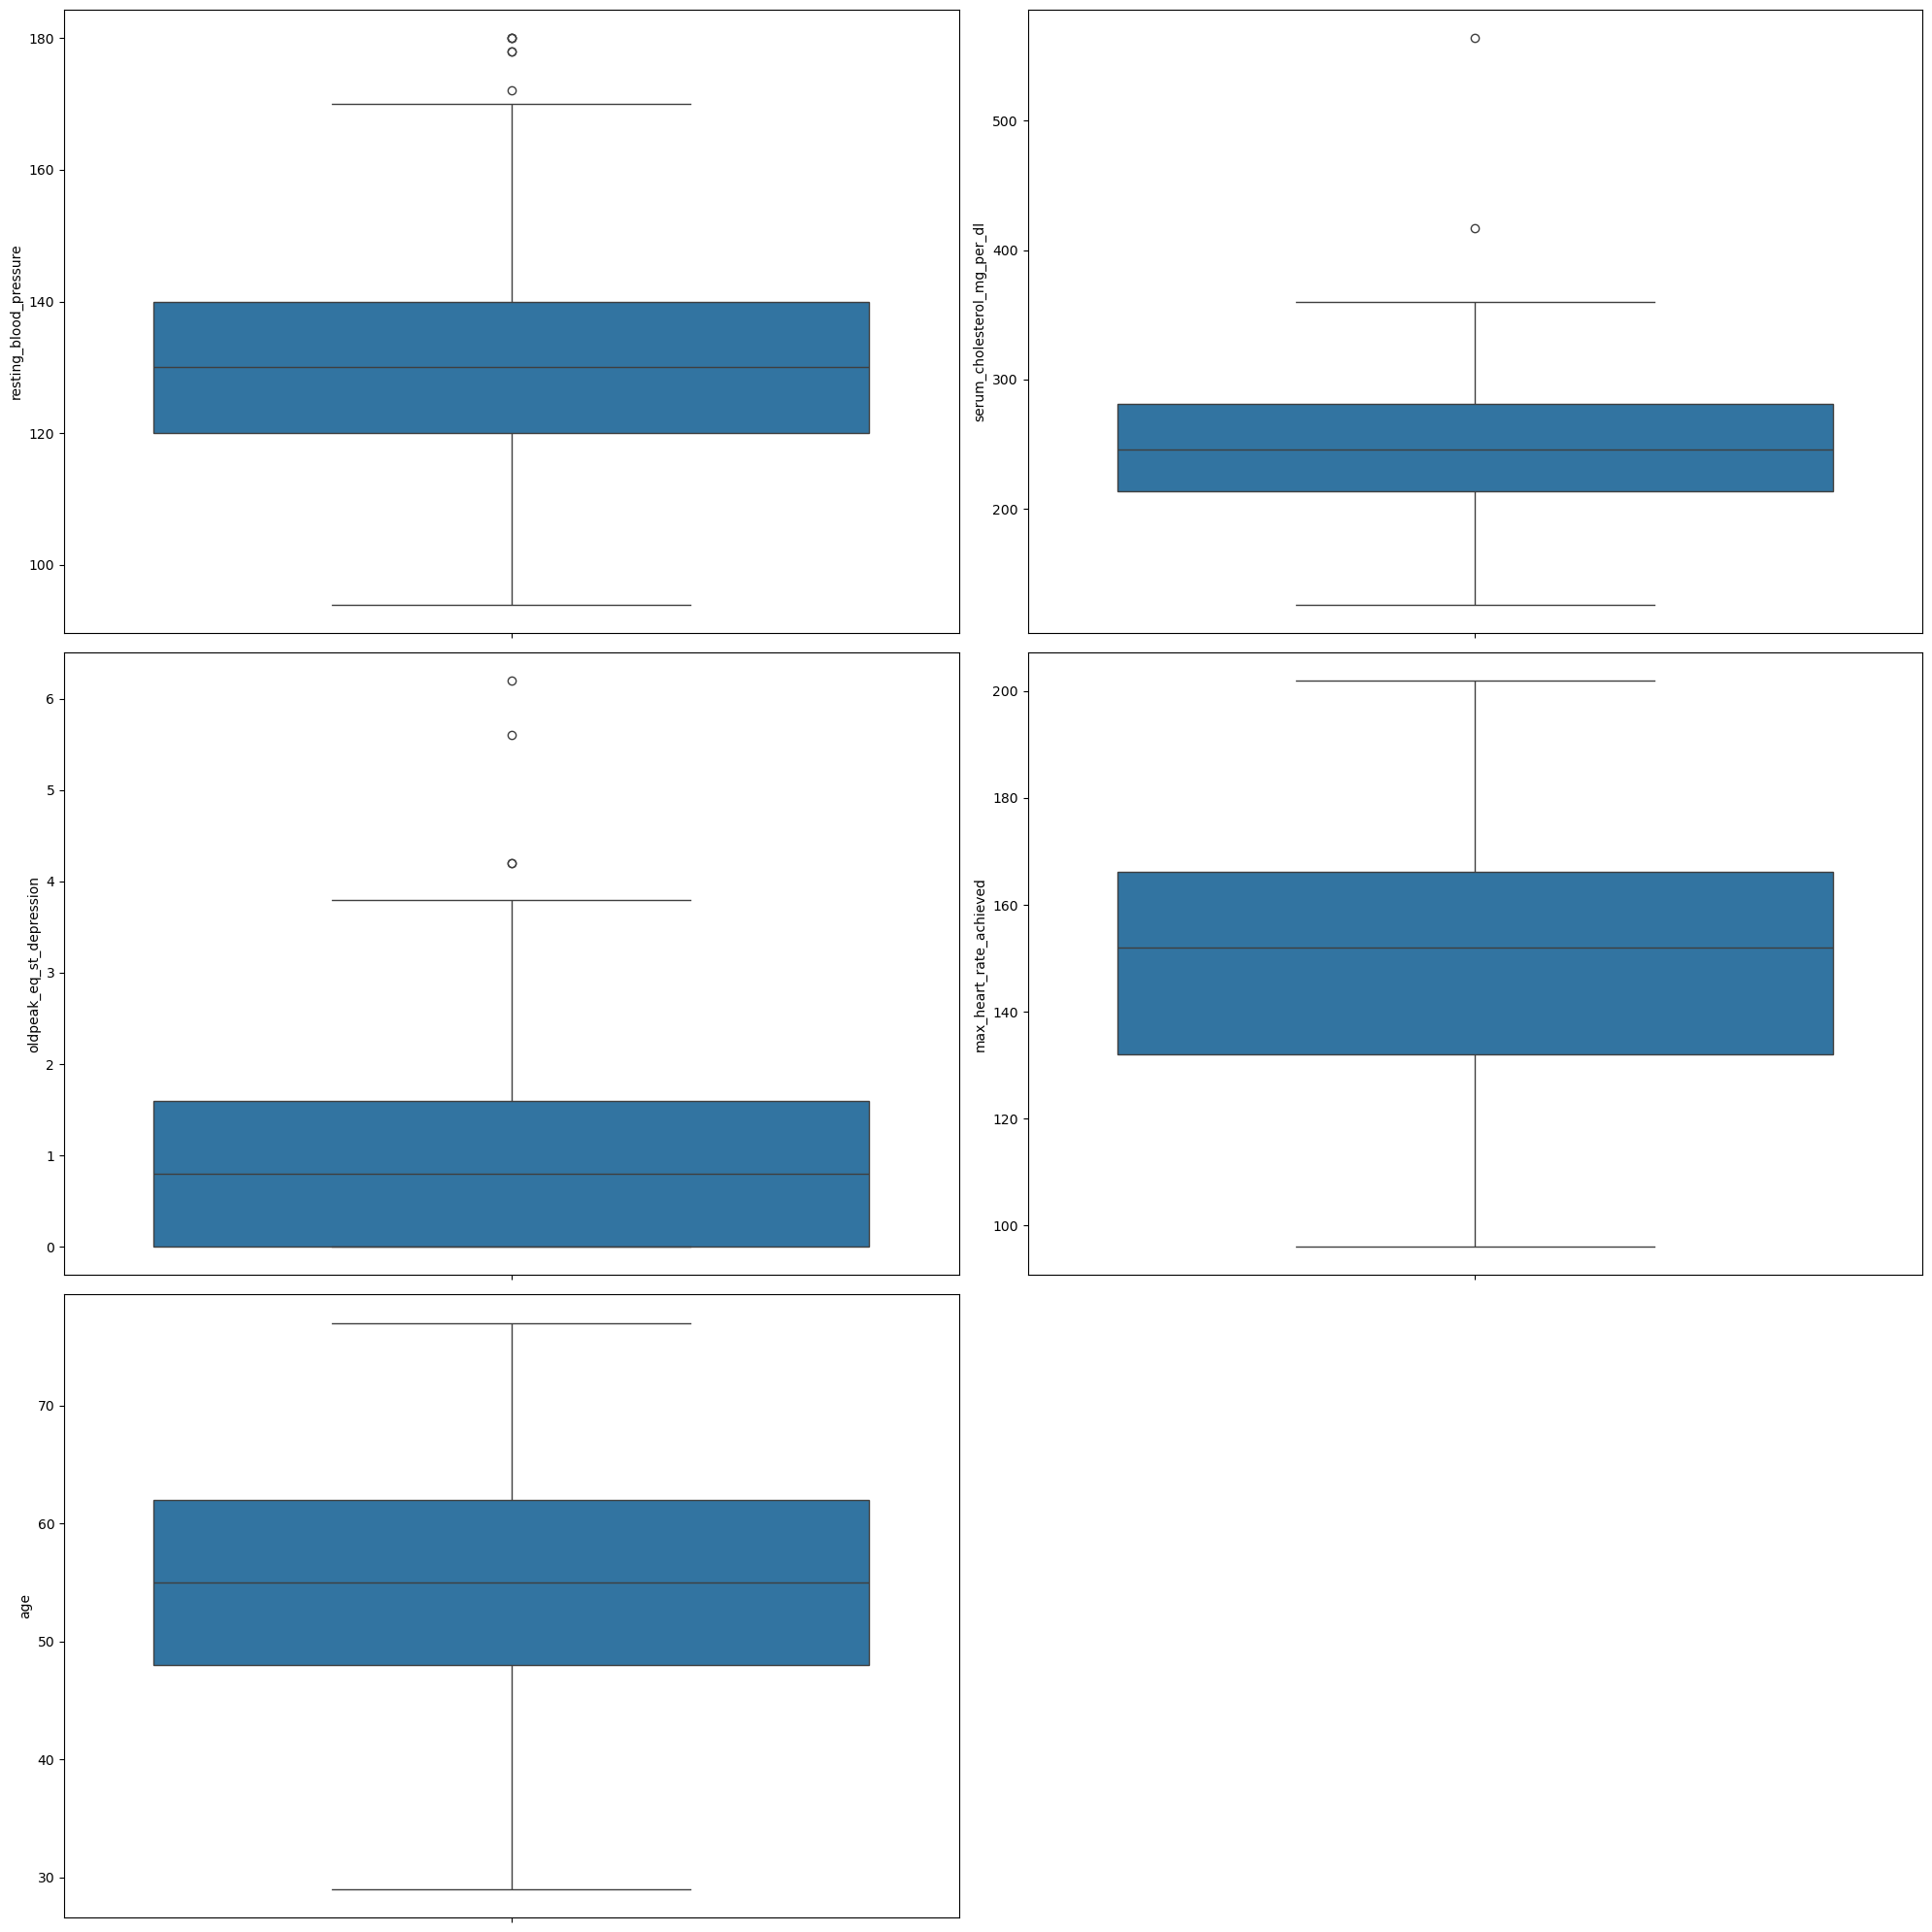

In [16]:
# Continuous(boxplot)
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for col in continuous:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(data[col])
    plotnumber+=1
plt.tight_layout()
plt.show()

In [17]:
# Insights
# some of the columns contains outliers,these are the valid points about the patients  so we cant handle the outliers

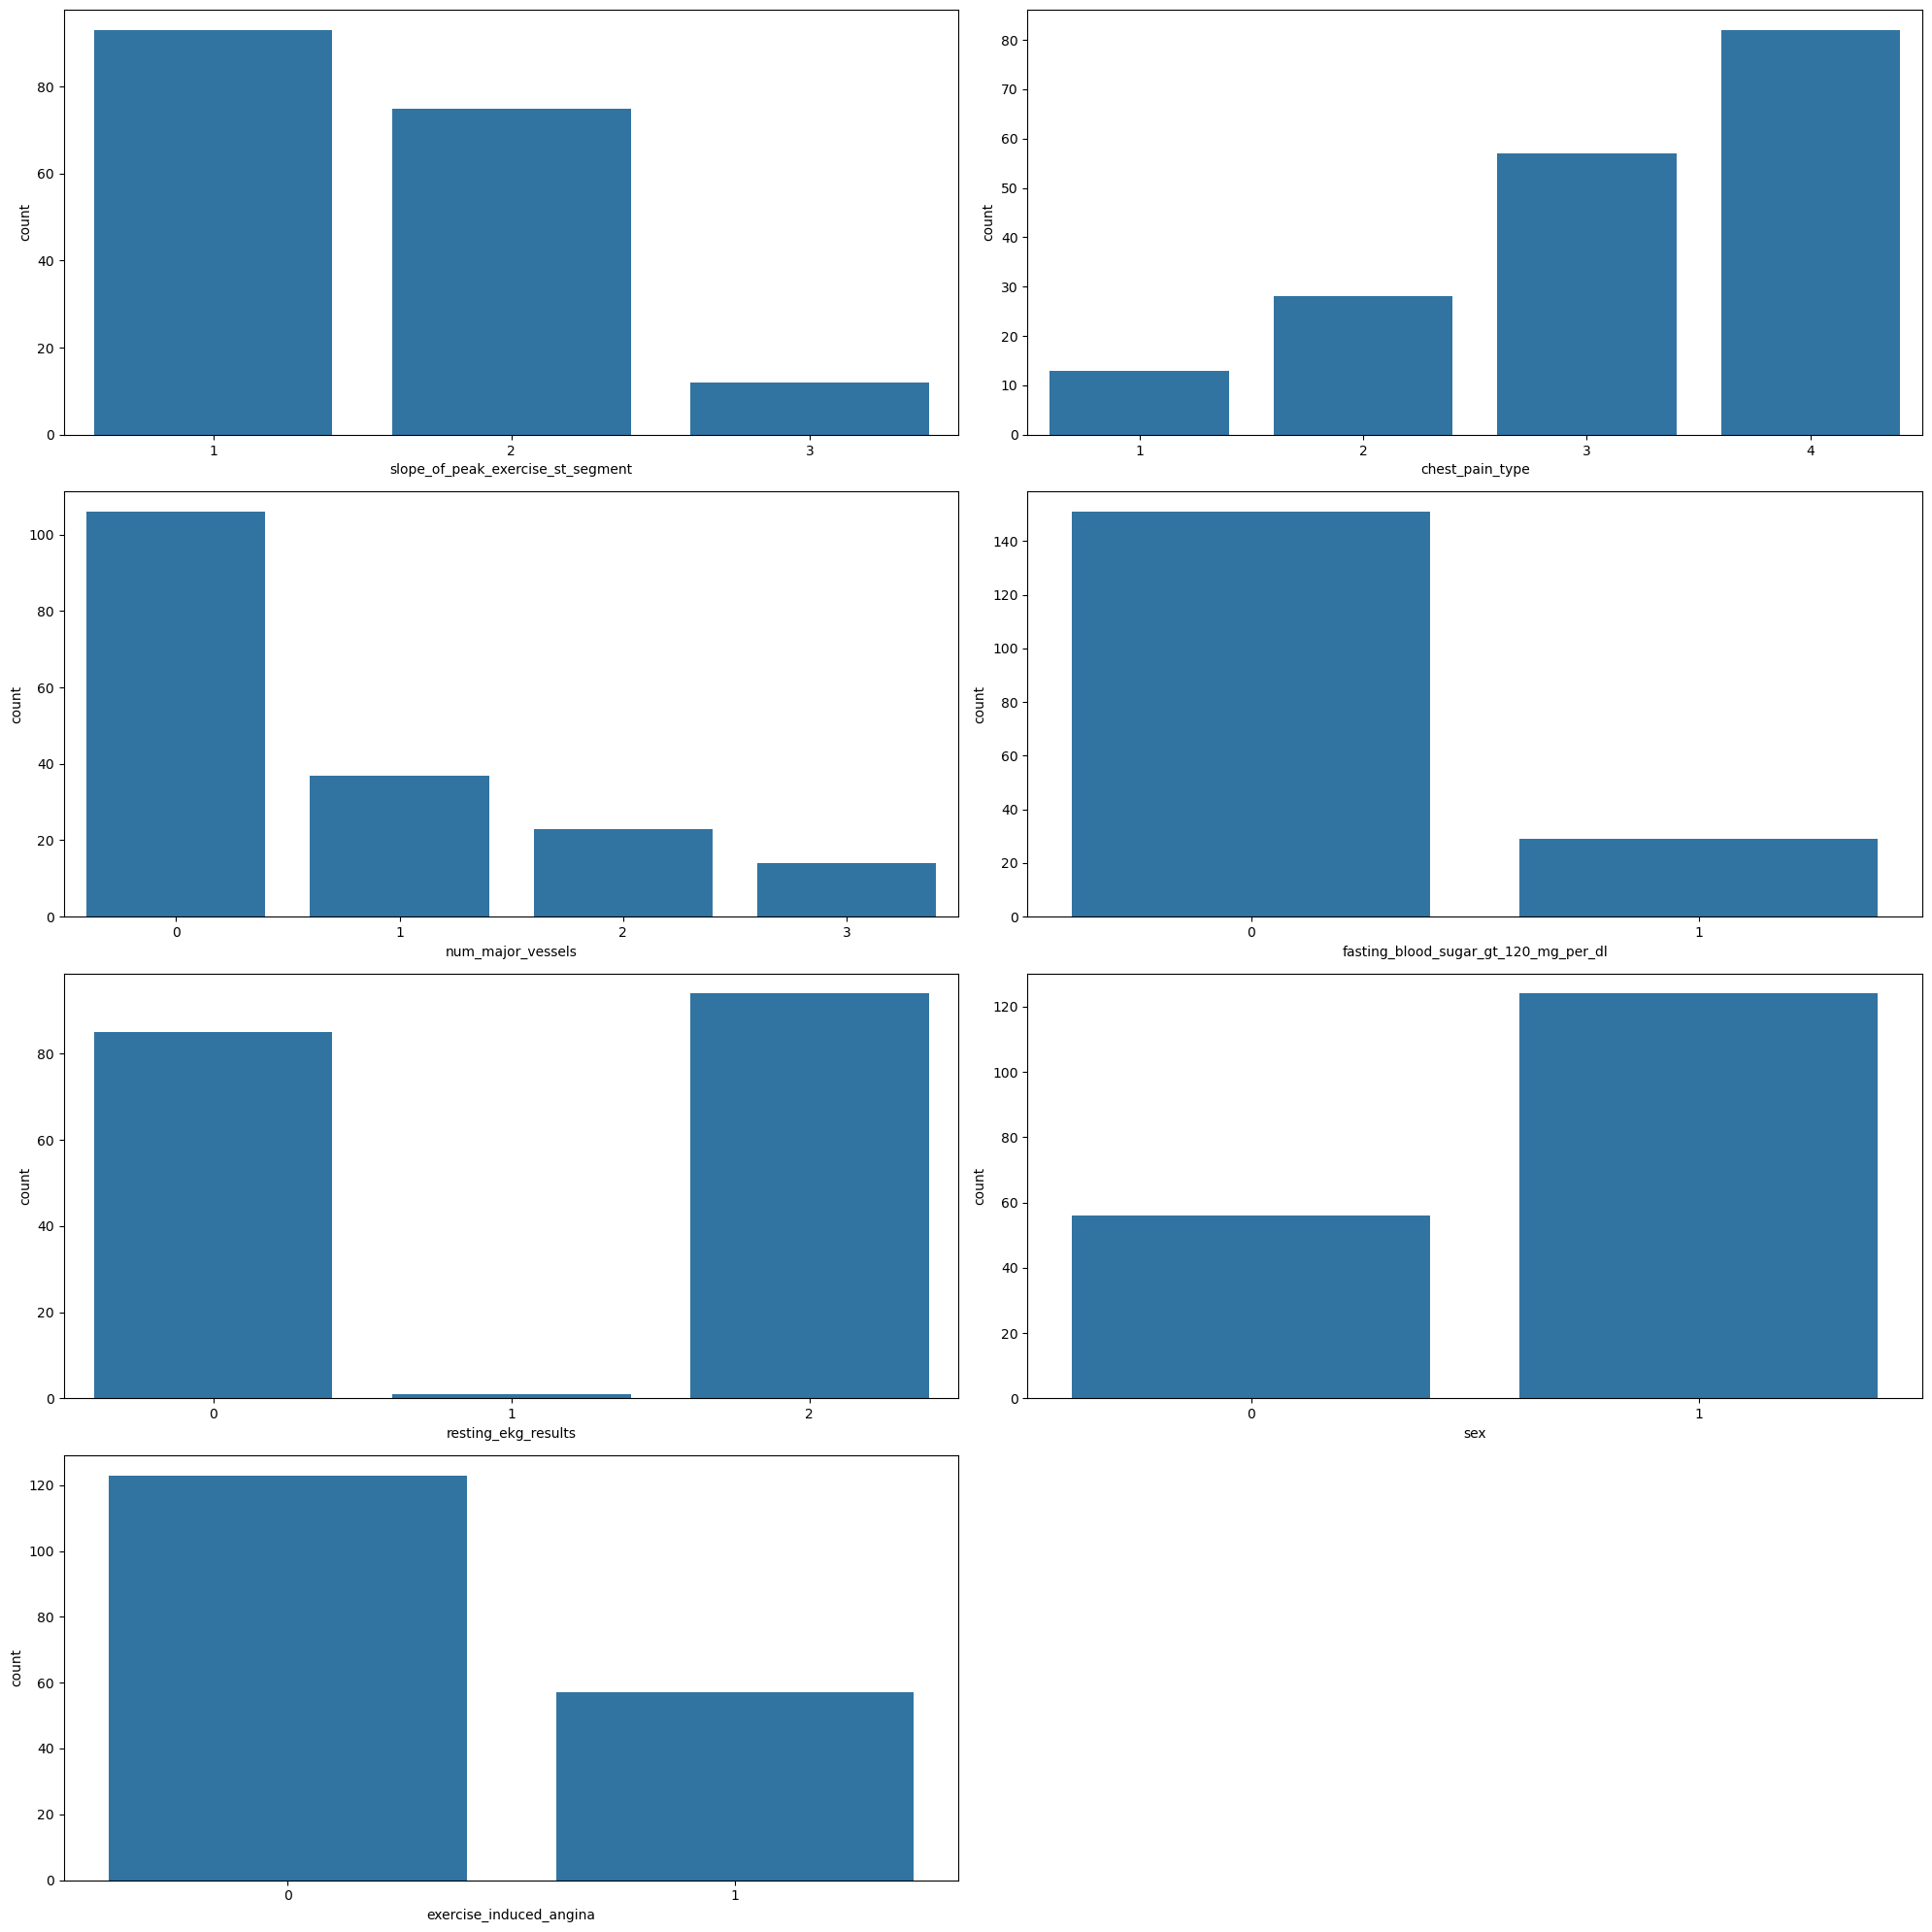

In [18]:
# Discreate
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for col in discreate:
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.countplot(x=data[col])
    plotnumber+=1
plt.tight_layout()
plt.show()

In [19]:
# Insights
# slope_of_peak_exercise_st_segment: Categories 1 and 2 dominate, while category 3 is least common.
# Chest_pain_type: Chest pain type 4 is most frequent, while type 1 is least common.
# num_major_vessels: Most patients have 0 major vessels affected, with very few having 3 vessels, indicating possible class imbalance.
# fasting_blood_sugar_gt_120_mg_per_dl: Majority of patients have normal fasting blood sugar levels (≤120 mg/dl).
# resting_ekg_results: Most patients show normal ECG results, while fewer show abnormalities.
# sex: Male patients are more prevalent in the dataset than female patients.
# exercise_induced_angina: Most patients do not experience exercise-induced angina.

<Axes: xlabel='count', ylabel='thal'>

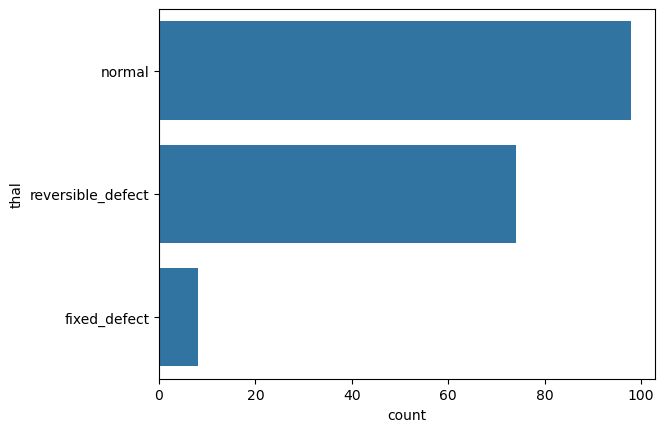

In [20]:
# categorical
sns.countplot(data['thal'])

In [21]:
# Insights
# Most patients have normal thal results, followed by reversible defects, while fixed defects are very rare in the dataset.

## Bivarient Analysis

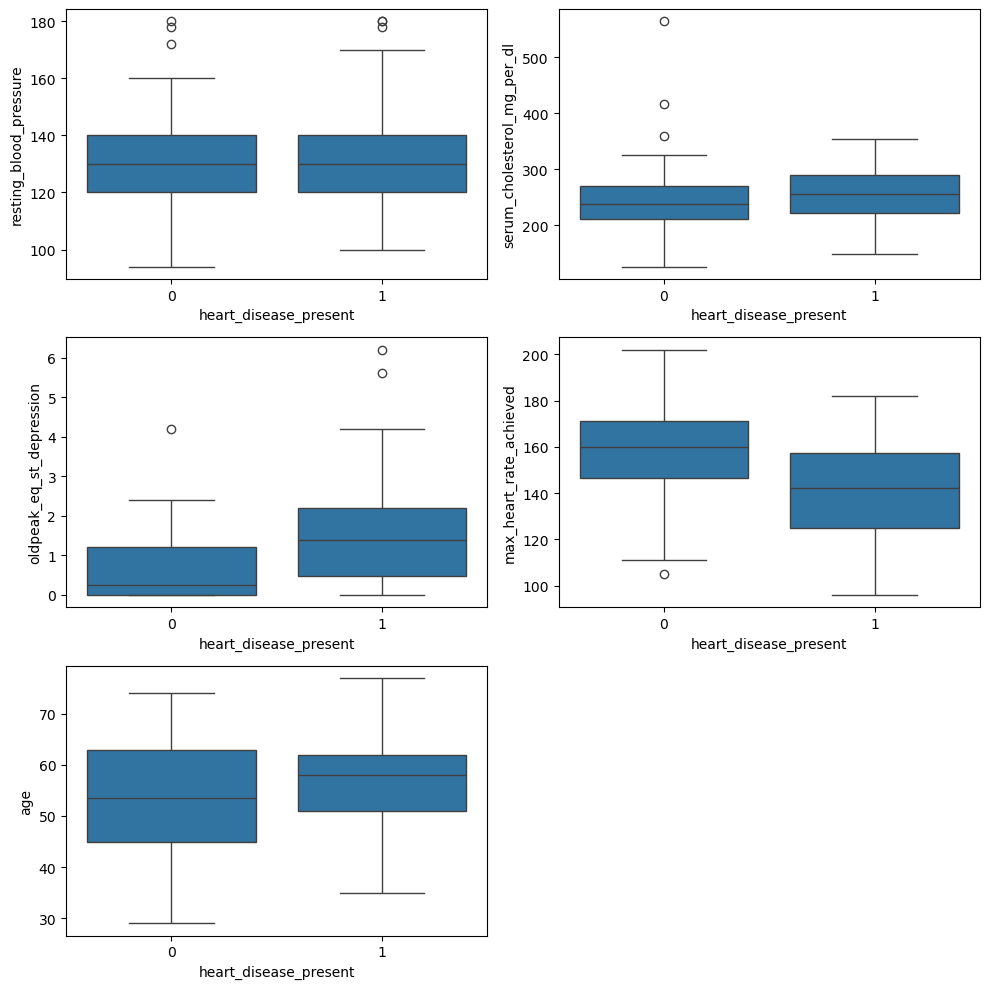

In [22]:
# Continuous
plt.figure(figsize=(10,10),facecolor="white")
plotnumber=1
for col in continuous:
    if plotnumber <= 5:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(x=target['heart_disease_present'], y=col, data=data)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [23]:
# Insights
# Resting Blood Pressure: Patients with heart disease show slightly higher median resting blood pressure than non-diseased patients.
# Serum Cholesterol: Cholesterol levels are generally higher among patients with heart disease, though there is overlap.
# Oldpeak (ST Depression): Heart disease patients have noticeably higher ST depression values, indicating strong association.
# Max Heart Rate Achieved: Patients with heart disease tend to have lower maximum heart rates compared to healthy patients.
# Age: Heart disease patients are generally older than those without heart disease.

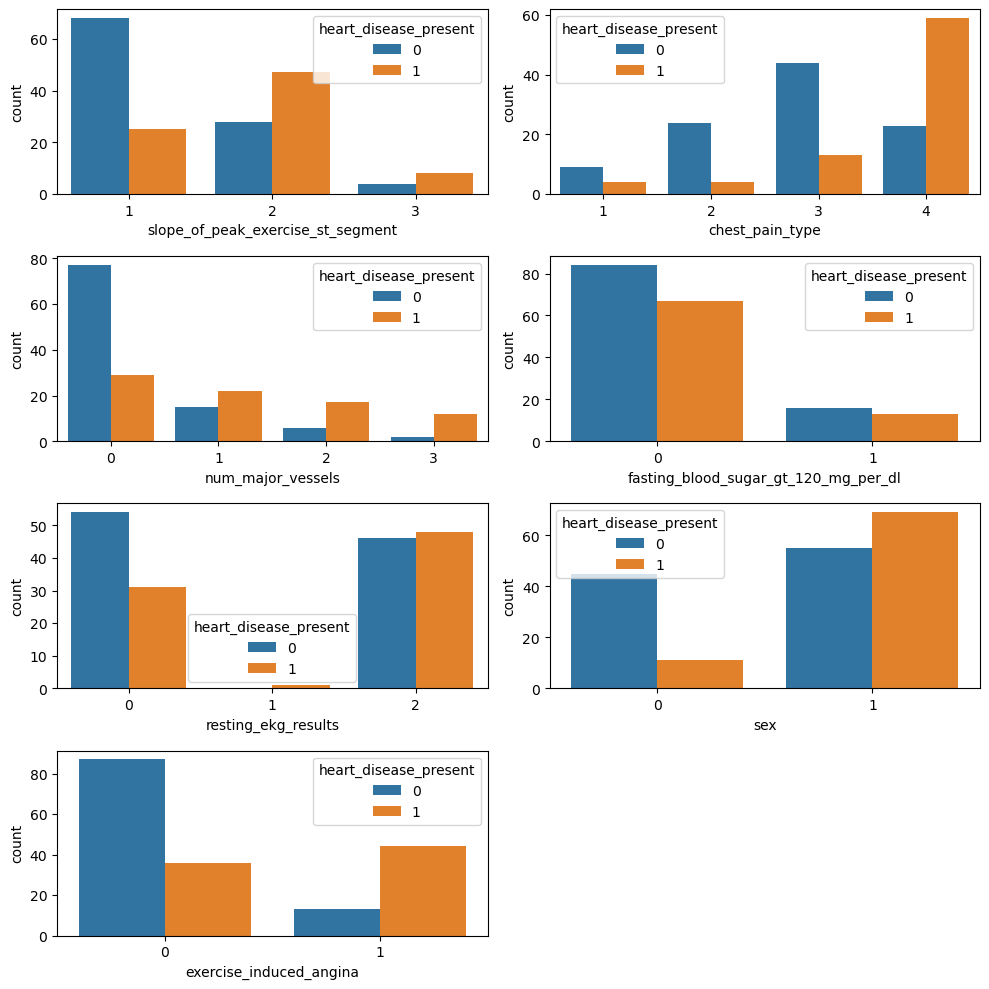

In [24]:
# Discreate
plt.figure(figsize=(10,10),facecolor="white")
plotnumber=1
for col in discreate:
    if plotnumber <= 7:
        ax=plt.subplot(4,2,plotnumber)
        sns.countplot(x=data[col],hue=target['heart_disease_present'])
    plotnumber+=1
plt.tight_layout()
plt.show()

<Axes: xlabel='thal', ylabel='count'>

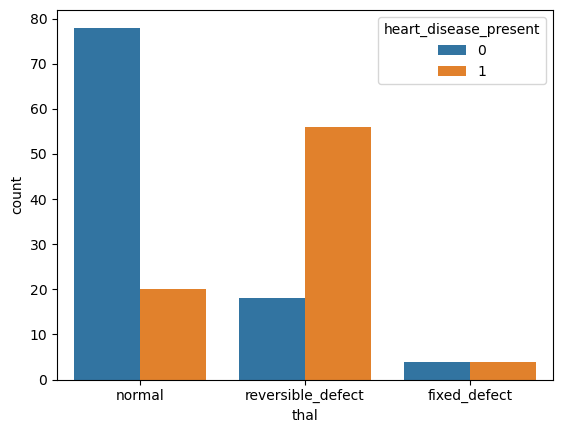

In [25]:
# Categorical
sns.countplot(x=data['thal'],hue=target['heart_disease_present'])

In [26]:
# Insights
# Thal: Patients with reversible defects show a much higher occurrence of heart disease,
# while normal thal results are mostly associated with no disease.

## Multivarient Analysis

In [27]:
data['heart_disease_present']=target['heart_disease_present']

In [28]:
continuous_hm=['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','max_heart_rate_achieved','age','heart_disease_present']
discreate_hm=['slope_of_peak_exercise_st_segment','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl',
          'resting_ekg_results','sex','exercise_induced_angina','heart_disease_present']

<Axes: >

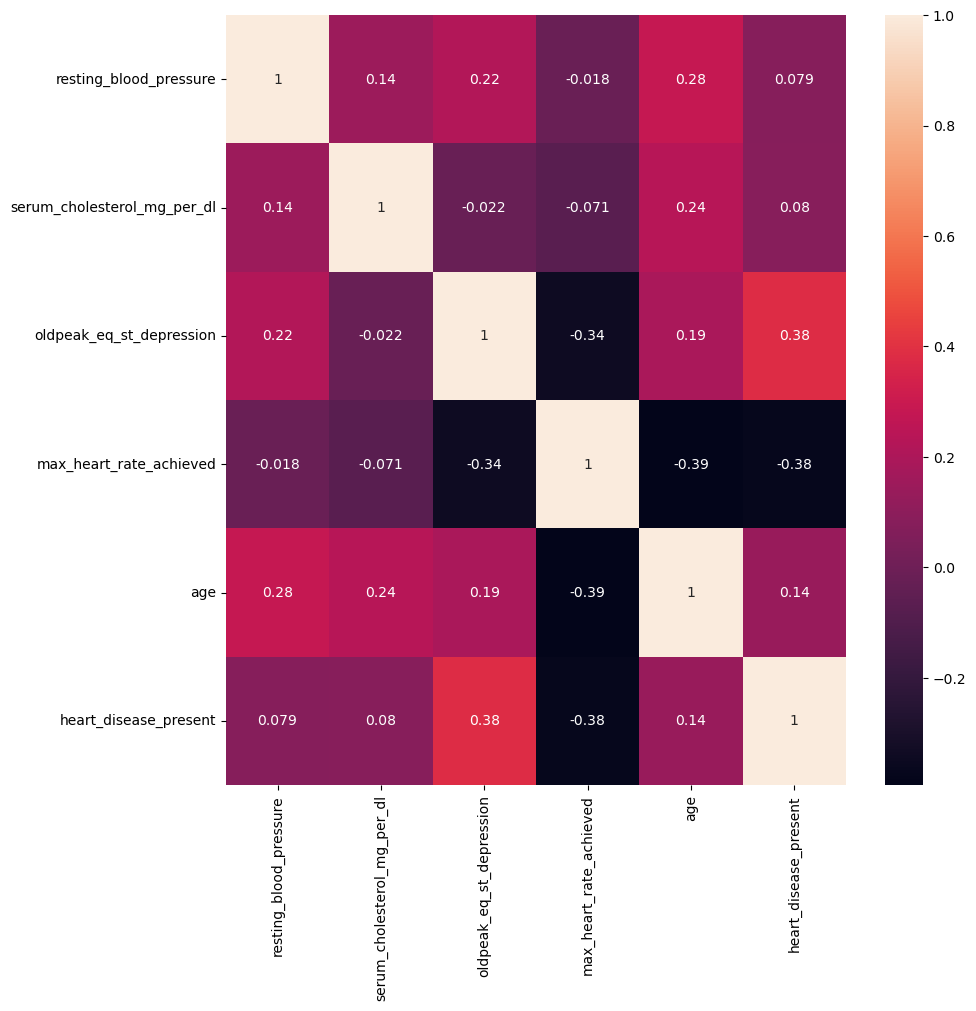

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(data[continuous_hm].corr(),annot=True,annot_kws={'size':10})

In [30]:
# Insights
# Oldpeak shows the strongest positive correlation with heart disease, 
# while maximum heart rate shows a strong negative correlation, and other features have weak relationships with the target.

<Axes: >

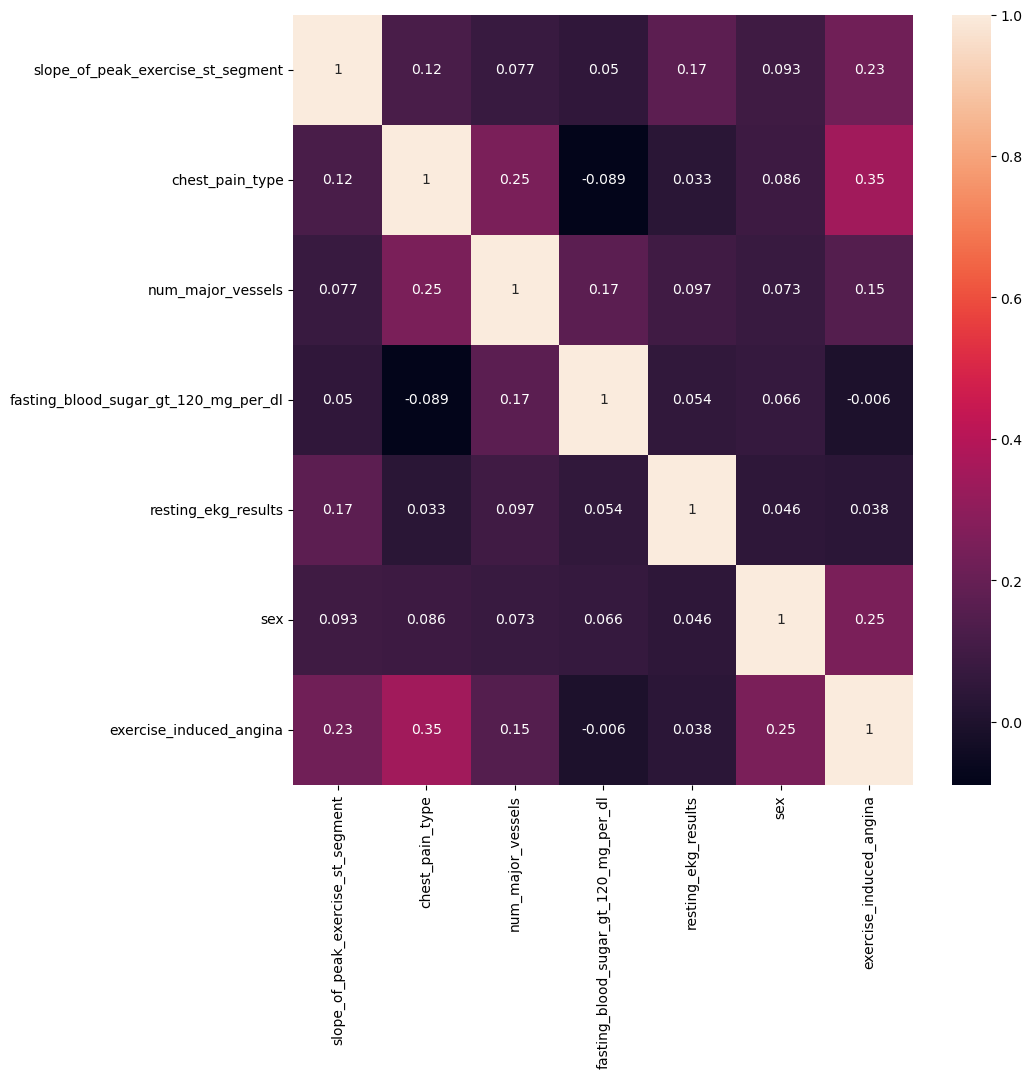

In [31]:
# discreate
plt.figure(figsize=(10,10))
sns.heatmap(data[discreate].corr(),annot=True,annot_kws={'size':10})

In [32]:
# Insights
# Exercise-induced angina, number of major vessels, and chest pain type show the strongest positive correlation with heart disease, 
# while fasting blood sugar has almost no relationship with the target.

In [33]:
data.drop(columns=['resting_blood_pressure','fasting_blood_sugar_gt_120_mg_per_dl'],inplace=True)

In [34]:
# Inisghts
# Drop the columns which have very less correlation with the target column

## Data Preprocessing

In [35]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,2,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,3,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,4,3,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,4,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,1,0,2,270,4.2,1,59,145,0,0


In [36]:
data.drop(columns='patient_id',inplace=True)

In [37]:
# creating new features
data['age_oldpeak']=data['age']*data['oldpeak_eq_st_depression']

## Conversion of categorical variable into numerical variable

In [38]:
data.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [39]:
data['thal']=data['thal'].map({'fixed_defect':0,'reversible_defect':1,'normal':2})

In [40]:
# insights
# use a manual mapping to convert the caegorical data into numerical data

## Handle Outliers(Skewness)

In [41]:
continuous_skew=['serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','max_heart_rate_achieved','age',
                 'age_oldpeak']

In [42]:
for col in continuous_skew:
    print(col,data[col].skew())

serum_cholesterol_mg_per_dl 1.2739315506526112
oldpeak_eq_st_depression 1.5074124471085
max_heart_rate_achieved -0.3937048051980345
age -0.19916557103159252
age_oldpeak 1.5805350098335658


In [43]:
for col in continuous_skew:
    if data[col].skew()>1:
        data[col]=np.log1p(data[col])

In [44]:
# insights
# we dont handle the outliers because they are a valid information so we use log transform to reduce the skewness

## split the data

In [45]:
x=data.drop('heart_disease_present',axis=1)
y=data.heart_disease_present

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [47]:
x_train_scaled=x_train.copy()
x_test_scaled=x_test.copy()

## scale the conitinuous data

In [48]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_scaled[continuous_skew]=scale.fit_transform(x_train[continuous_skew])
x_test_scaled[continuous_skew]=scale.transform(x_test[continuous_skew])

## Model Building

In [49]:
# lOGISITIC REGRESSION
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression(random_state=42)
lo.fit(x_train_scaled,y_train)
y_pred=lo.predict(x_test_scaled)

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))

0.8444444444444444


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.73      0.84        26

    accuracy                           0.84        45
   macro avg       0.87      0.87      0.84        45
weighted avg       0.89      0.84      0.84        45



In [52]:
print(confusion_matrix(y_test,y_pred))

[[19  0]
 [ 7 19]]


## Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score
x_scale=scale.fit_transform(x)
score_recall = cross_val_score(
    lo,
    x_scale,
    y,
    cv=5,
    scoring='recall'
)

print("Recall scores:", score_recall)
print("Mean Recall:", score_recall.mean())

Recall scores: [0.625  0.875  0.8125 0.75   0.6875]
Mean Recall: 0.75


In [74]:
# Insights
# Logistic Regression achieved 84% accuracy on the test set with a strong and balanced F1-score of 0.84.
# The model shows 73% recall for heart disease cases, meaning it correctly identifies most positive patients.
# 5-Fold Cross Validation produced an average recall of 75%, which is close to the test recall.
# This small gap indicates the model is stable, generalizes well, and is not overfitting for the 180-row dataset

## Decision tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
ds=DecisionTreeClassifier()
ds.fit(x_train,y_train)
y_pred1=ds.predict(x_test)

In [65]:
print(accuracy_score(y_test,y_pred1))

0.7111111111111111


In [66]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.62      0.84      0.71        19
           1       0.84      0.62      0.71        26

    accuracy                           0.71        45
   macro avg       0.73      0.73      0.71        45
weighted avg       0.75      0.71      0.71        45



In [76]:
# Insighhts
# The default Decision Tree achieved around 71% accuracy with 62% recall for heart disease cases.
# It detects a moderate number of positive cases but misses more patients compared to Logistic Regression.
# The model shows slightly unstable performance due to the small dataset size.
# Overall, it performs reasonably but is less stable and slightly weaker than Logistic Regression.

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(
    n_estimators=100,
    min_samples_split= 10,
    min_samples_leaf=2,
    max_depth=3,
    class_weight='balanced',
    random_state=42
)
rf.fit(x_train,y_train)
y_pred2=rf.predict(x_test)

In [68]:
print(accuracy_score(y_test,y_pred2)*100)

84.44444444444444


In [69]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.73      0.84        26

    accuracy                           0.84        45
   macro avg       0.87      0.87      0.84        45
weighted avg       0.89      0.84      0.84        45



## Hyperparameter tuning

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'class_weight': ['balanced']
}
rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid.fit(x, y)
print("Best Parameters:", grid.best_params_)
print("Best Recall Score:", grid.best_score_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Recall Score: 0.8


In [77]:
# Insights
# The default Random Forest achieved around 80% accuracy but showed moderate recall, indicating limited improvement over simpler models.
# After hyperparameter tuning with balanced class weights, performance improved to 84% accuracy with 73% recall, matching Logistic Regression results.
# Tuning helped control overfitting and improved heart disease detection.
# However, due to the small dataset size, Random Forest did not significantly outperform Logistic Regression despite its higher complexity.

## AUC ROC CURVE

In [80]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = lo.predict_proba(x_test_scaled)[:,1]

auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)

AUC Score: 0.8785425101214575


In [81]:
# Insights
# The Logistic Regression model achieved an AUC score of 0.88, indicating strong discriminatory power in identifying heart disease cases. 
# The model demonstrates good generalization and reliable performance for early risk prediction.

## Model Selection

1 Higher Predictive Performance
Logistic Regression achieved the highest test accuracy (84%) with a strong AUC score (0.88), outperforming Decision Tree and matching Random Forest with better stability.

2 Better Generalization
The 5-fold cross-validation recall score of 75% confirms that Logistic Regression performs consistently across different data splits without overfitting.

3 Controlled Model Complexity
Decision Tree and Random Forest did not significantly improve performance after tuning, indicating that the dataset does not require complex nonlinear models.

4 Interpretability and Practical Use
Logistic Regression provides clear coefficient interpretation, making it more suitable for healthcare decision-making while maintaining strong predictive performance.

## Business Impact

1 Early Risk Identification
The model helps hospitals identify high-risk heart disease patients early, enabling timely medical intervention and reducing life-threatening complications.

2 Improved Clinical Decision Support
Doctors can use the prediction results alongside medical reports to make faster and more informed treatment decisions.

3 Cost Reduction for Hospitals
Early detection can reduce emergency admissions, ICU usage, and long-term treatment costs by preventing severe cardiac events.

4 Data-Driven Preventive Care
Hospitals can design targeted lifestyle and monitoring programs for high-risk patients based on model predictions, improving overall patient outcomes.

## Conclusion

This project focused on predicting heart disease using machine learning techniques on a structured healthcare dataset. After performing exploratory data analysis, feature engineering, model building, hyperparameter tuning, and cross-validation, multiple algorithms were evaluated including Logistic Regression, Decision Tree, and Random Forest.

Among them, Logistic Regression achieved the best overall performance with 84% accuracy, 73% recall, and an AUC score of 0.88, demonstrating strong predictive capability and good generalization.

The results indicate that the dataset primarily follows linear patterns, making Logistic Regression both effective and interpretable for medical decision-making.

This model can support hospitals in early heart disease risk detection, enabling timely intervention and improving patient outcomes while maintaining simplicity and reliability.